## 7장 5절 선형 회귀분석

### 파이썬을 활용한 단순 선형 회귀분석

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import numpy as np

In [2]:
df_house = pd.read_csv('./data/kc_house_data.csv')
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [3]:
df_house = df_house.loc[:,['price','sqft_living']]
df_house

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


In [4]:
df_house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [5]:
import matplotlib.pyplot as plt

In [6]:
y = df_house['price']
X = df_house[['sqft_living']]
print(X.shape, y.shape)

(21613, 1) (21613,)


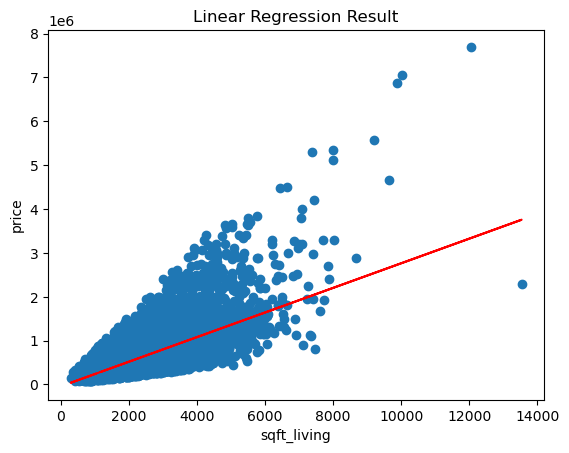

In [7]:
lr = ols('price~sqft_living', data=df_house).fit()
y_pred = lr.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('sqft_living', fontsize = 10)
plt.ylabel('price', fontsize = 10)
plt.title('Linear Regression Result')
plt.show()

In [8]:
X

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [9]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 15 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:41:48   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 다중 선형 회귀분석 실습

In [10]:
import pandas as pd

df_cars = pd.read_csv('./data/Cars93.csv')
df_cars

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,NaN,Front,...,7,187,115,72,38,34.0,-2147483648,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,NaN,Front,...,5,180,103,67,35,31.5,14,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,NaN,Front,...,4,159,97,66,36,26.0,15,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14,2985,non-USA,Volvo 240


In [11]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [12]:
df_cars.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               34
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room           0
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [13]:
from statsmodels.formula.api import ols

df_cars.columns = df_cars.columns.str.replace('.', '')

lr = ols('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=df_cars)
result = lr.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.88e-14
Time:                        08:41:50   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
df_cars.loc[:,['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [15]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [16]:
y, X = dmatrices('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=df_cars, return_type='dataframe')
X

,Intercept,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
0,1.0,1.8,6300.0,2705.0,177.0,25.0,31.0
1,1.0,3.2,5500.0,3560.0,195.0,18.0,25.0
2,1.0,2.8,5500.0,3375.0,180.0,20.0,26.0
3,1.0,2.8,5500.0,3405.0,193.0,19.0,26.0
4,1.0,3.5,5700.0,3640.0,186.0,22.0,30.0
...,...,...,...,...,...,...,...
88,1.0,2.5,4500.0,3960.0,187.0,17.0,21.0
89,1.0,2.0,5800.0,2985.0,180.0,21.0,30.0
90,1.0,2.8,5800.0,2810.0,159.0,18.0,25.0
91,1.0,2.3,5400.0,2985.0,190.0,21.0,28.0


In [17]:
vif_list=[]
for i in range(1, len(X.columns)):
    vif_list.append([vif(X.values, i), X.columns[i]])
    
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [19]:
y2, X2 = dmatrices(formula_like='Price~EngineSize+RPM+Weight+MPGhighway', data=df_cars, return_type = 'dataframe')
X2

,Intercept,EngineSize,RPM,Weight,MPGhighway
0,1.0,1.8,6300.0,2705.0,31.0
1,1.0,3.2,5500.0,3560.0,25.0
2,1.0,2.8,5500.0,3375.0,26.0
3,1.0,2.8,5500.0,3405.0,26.0
4,1.0,3.5,5700.0,3640.0,30.0
...,...,...,...,...,...
88,1.0,2.5,4500.0,3960.0,21.0
89,1.0,2.0,5800.0,2985.0,30.0
90,1.0,2.8,5800.0,2810.0,25.0
91,1.0,2.3,5400.0,2985.0,28.0


In [24]:
df_vif2 = pd.DataFrame()
df_vif2['columns'] = X2.columns[1:]
df_vif2['vif value'] = [vif(X2.values, i) for i in range(1, X2.shape[1])]
df_vif2

,columns,vif value
0,EngineSize,4.239741
1,RPM,1.437939
2,Weight,6.444357
3,MPGhighway,3.021837


In [18]:
lr = ols(formula = 'Price ~ EngineSize + RPM + Weight + MPGhighway', data=df_cars)
result = lr.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     28.98
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.26e-15
Time:                        00:33:32   Log-Likelihood:                -303.29
No. Observations:                  93   AIC:                             616.6
Df Residuals:                      88   BIC:                             629.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7063     14.846     -2.540      0.013     -67.210      -8.203
EngineSize     4.5884      1.343      3.418      0.001       1.920       7.256
RPM            0.0071      0.001      5.232      0.000       0.004       0.010
Weight         0.0049      0.003      1.690      0.095      -0.001       0.011
MPGhighway    -0.2646      0.221     -1.200      0.234      -0.703       0.174
==============================================================================
Omnibus:                       62.072   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.013
Skew:                           2.047   Prob(JB):                     1.22e-80
Kurtosis:                      11.843   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 변수 선택법

In [46]:
import time
import itertools
import statsmodels.api as sm

def processSubset(X,y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {'model':regr, 'AIC':AIC}

def forward(X, y, predictors):
    print('============== in forward =============')
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['Intercept']))
        
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:', best_model['model'].model.exog_names, ' AIC:', best_model[0])
    return best_model

def backward(X,y,predictors):
    print('============== in backward =============')
    tic=time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(X=X, y=y, feature_set=list(combo)+['Intercept']))
        
    models=pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:', best_model['model'].model.exog_names, ' AIC:', best_model[0])
    return best_model

def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']
    
    for i in range(1, len(X.columns.difference(['Intercept']))+1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        
        if Backward_result['AIC'] < Forward_result['AIC'] :
            Stepmodels.loc[i] = Backward_result       
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'Intercept']
            print('backward')
        
        if Stepmodels.loc[i]['AIC'] > Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
            
    toc = time.time()
    print('Total elapsed time: ', (toc-tic), 'seconds.')
    
    return(Stepmodels['model'][len(Stepmodels['model'])])    

Stepwise_best_model = Stepwise_model(X=X, y=y)


============== in forward =============
Processed  6 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002082481F4C0>
forward
============== in backward =============
Processed  1 models on 2 predictors in 0.002008199691772461
Selected predictors: ['Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000208269B4CD0>
============== in forward =============
Processed  5 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002082481F8E0>
forward
============== in backward =============
Processed  2 models on 3 predictors in 0.0030050277709960938
Selected predictors: ['Weight', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002082481F3A0>
============== in forward =============
Processed  4 m

['Weight', 'RPM', 'EngineSize', 'Intercept']

In [47]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           6.75e-16
Time:                        10:13:07   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""